In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import time
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

<br><br>


### Download MNIST dataset and show some examples to make sure we read in the data correctly

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


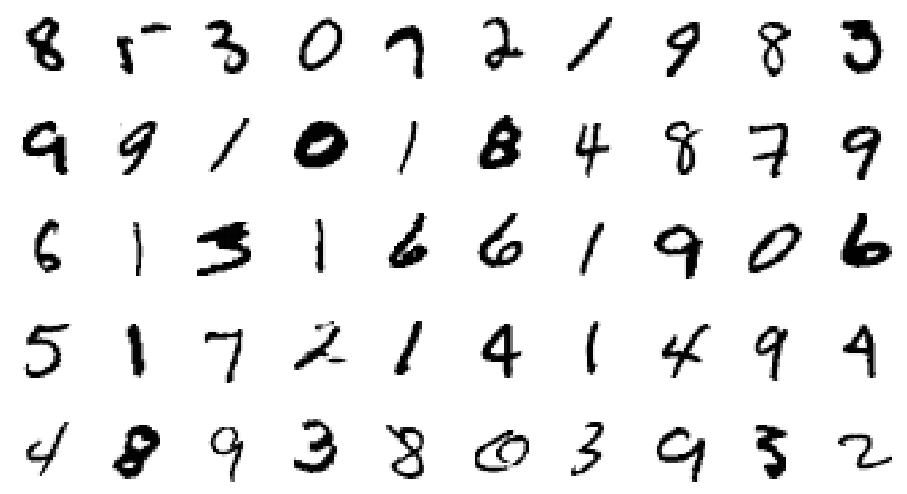

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True);

n_test = mnist.test.num_examples
size = 28 # size of each dimension 

fig, ax = plt.subplots(5,10, figsize=(16,9))
for i in range(5):
    for j in range(10):
        ax[i,j].grid(False)
        ax[i,j].set_xticklabels([])
        ax[i,j].set_yticklabels([])
        # pick a random test image and shape it into a square to allow for image plotting
        ax[i,j].imshow(mnist.test.images[np.random.randint(n_test)].reshape(size,size), cmap = 'Greys')


<br><br>

### Create parameters and variables

allows for dynamic NN arthitecture and much less repetitive code

In [3]:
# NN architecture 
n_classes = 10 # has to stay constant for MNIST
n_input = 784 # Has to stay constant for MNIST
n_hidden = [400,400] # Number of neurons per layer  
n_layers = [n_input] + n_hidden + [n_classes] # full description of NN

# number of 
training_epochs = 15

learning_rate = .001
batch_size = 100

# input
x = tf.placeholder("float", [None,n_input])
y = tf.placeholder("float", [None,n_classes])

def build_model(n_layers):
    weights = [tf.Variable(tf.random_normal([n_layers[i],n_layers[i+1]])) for i in range(len(n_layers) - 1)]
    biases = [tf.Variable(tf.random_normal([n])) for n in n_layers[1:]]
    return weights, biases

<br><br>

### Create Feedforward network

In [6]:
def simple_neural_net(x, weights, biases, activation_f= None):
    
    # define what activation functions on each layer
    # by default it has recilinear on all hidden layer and 
    # nothing on the output
    if activation_f == None:
        activation_f = [tf.nn.relu]*(len(weights)-1)+[lambda x: x]
    
    out = x
    for weight,bias,f in zip(weights,biases,activation_f):
        out = tf.add(tf.matmul(out,weight),bias)
        out = f(out)
    return out

<br><br>

### Create prediction

In [7]:
weights, biases = build_model(n_layers)

# Construct model
prediction = simple_neural_net(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

<br><br>

### Run Model

Optimization Finished!
Accuracy: 0.953
Seconds elapsed: 112.42643022537231


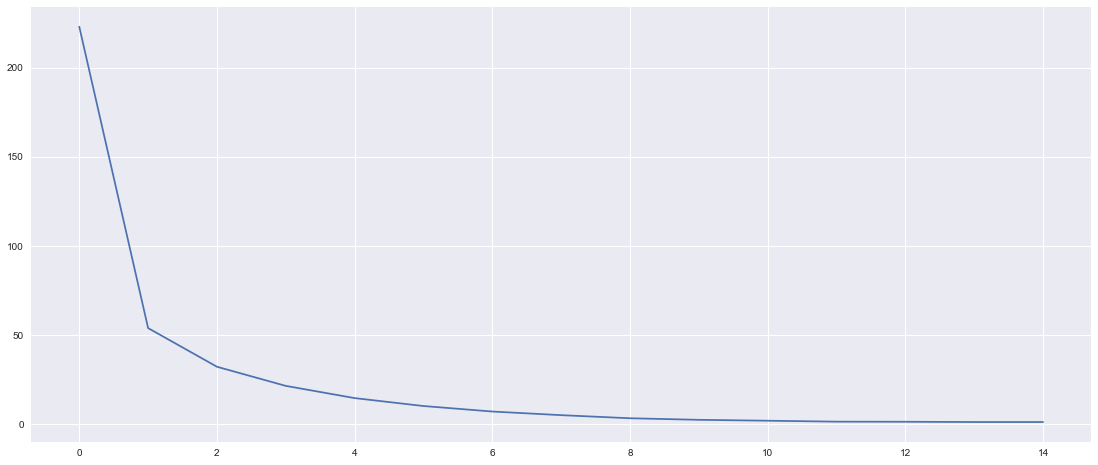

In [9]:
costs = []
start= time.time()

with tf.Session() as sess:
    
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            
            # Run optimization
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
            
        # Save cost history
        costs.append(avg_cost)

    print("Optimization Finished!")
    
    end = time.time()
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    print("Seconds elapsed:", end - start)
fig, ax = plt.subplots(figsize = (19,8))
ax.plot(costs)

pretty good, not that much better than the logistic regression though. TO-DO Since we allowed the model to by dynamic let's see how the changing the architecture effects the speed of training and accuracy 